# **Importing Libraries**
This cell imports the necessary libraries:

* **pandas:** For data manipulation and analysis.
* **os:** For interacting with the operating system (e.g., file and directory operations).
* **seaborn and matplotlib.pyplot:** For data visualization and plotting.
* **collections.Counter:** For counting occurrences of elements in data structures.
* **nltk:** For natural language processing tasks.
* **re:** For working with regular expressions (pattern matching in strings).

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import re


# **Accessing Data from Google Drive**
* Mounts Google Drive to the Colab environment.
* Specifies the file path to the CSV file stored in Google Drive.
* Verifies if the file exists at the given path.
* Loads the first 3000 rows of the CSV file into a pandas DataFrame (df), skipping any bad lines.
* Randomly samples 1000 rows from the DataFrame for analysis and stores it in sampled_df.








In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/gpt-4.csv'
print(os.path.exists(file_path))

True


In [4]:
df = pd.read_csv(file_path, on_bad_lines='skip', nrows=3000)
df

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."
...,...,...
2995,A 43-year-old female with dyspnoea was transfe...,Doctor: Good afternoon. You were transferred t...
2996,A 63-year-old female presented in 2016 with pa...,"Doctor: Hello, how are you feeling today?\nPat..."
2997,"A 72 year old female, with no significant past...","Doctor: Good morning, how are you feeling toda..."
2998,A 32-year-old female at pregnancy week 22 was ...,"Doctor: Hello, how are you feeling today?\nPat..."


In [5]:
# Randomly sample 1000 rows for analysis
sampled_df = df.sample(n=1000, random_state=42)
sampled_df

,data,conversation
1801,The third case was a 64-year-old female who ad...,"Doctor: Good afternoon, how are you feeling to..."
1190,A 34-year-old woman presented with severe epis...,"Doctor: Good morning, how can I help you today..."
1817,"A 53-year-old man, who had non-exertional ches...","Doctor: Hello, Mr. Johnson. How are you feelin..."
251,"A 34 year old woman from the east of Morocco, ...","Doctor: Good afternoon, Mrs. X. I see here in ..."
2505,A 19-year-old male of Caucasian origin was adm...,"Doctor: Hello, how are you feeling today?\nPat..."
...,...,...
618,A ten-year-old neutered female Cavalier King C...,"Doctor: Hello, how are you today?\nPatient: I'..."
406,A 65-year-old man with continuous irritable co...,"Doctor: Good morning, Mr. Johnson. How are you..."
1157,A 55-year-old woman without relevant medical h...,"Doctor: Hi, how are you feeling today?\nPatien..."
1068,A 52-year-old man was first diagnosed with HIV...,"Doctor: Hi there, how are you feeling today?\n..."


# **Importing Libraries and Downloading NLTK Resources**
* **Imports Libraries:** Imports necessary libraries for text processing, including:
1. **nltk.corpus.stopwords:** For stopwords removal.
2. **nltk.tokenize.word_tokenize:** For tokenizing text into words.
3. **nltk.stem.PorterStemmer and nltk.stem.WordNetLemmatizer:** For stemming and lemmatization.
4. **wordcloud.WordCloud:** For generating word clouds.
5. **textblob.TextBlob:** For sentiment analysis.
* **Downloading Resources:** Downloads essential NLTK datasets (punkt, punkt_tab, stopwords, wordnet) for tokenization, stopwords removal, and lemmatization.












In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from textblob import TextBlob
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Text Preprocessing**
* Defines a preprocessing function that tokenizes text, converts it to lowercase, removes stopwords, applies stemming and lemmatization.
* Applies the preprocess_text function to the 'data' and 'conversation' columns of the sampled DataFrame, creating two new columns: processed_data and processed_conversation.

In [7]:
# Preprocessing functions
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [8]:
# Define a preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens = [word for word in tokens if (re.match(r'\b\w+(-\w+)*\b', word) and word not in stop_words)]
    #'\b\w+(-\w+)*\b': This regex pattern matches words containing letters, numbers, and hyphens.
    # Stemming
    stems = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmas = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmas)

In [9]:
# Apply preprocessing to "data" and "conversation" columns
sampled_df['processed_data'] = sampled_df['data'].apply(preprocess_text)
sampled_df['processed_conversation'] = sampled_df['conversation'].apply(preprocess_text)

In [10]:
sampled_df

,data,conversation,processed_data,processed_conversation
1801,The third case was a 64-year-old female who ad...,"Doctor: Good afternoon, how are you feeling to...",third case 64-year-old female admitted chest p...,doctor good afternoon feeling today patient hm...
1190,A 34-year-old woman presented with severe epis...,"Doctor: Good morning, how can I help you today...",34-year-old woman presented severe episodic he...,doctor good morning help today patient hi expe...
1817,"A 53-year-old man, who had non-exertional ches...","Doctor: Hello, Mr. Johnson. How are you feelin...",53-year-old man non-exertional chest pain posi...,doctor hello mr. johnson feeling today patient...
251,"A 34 year old woman from the east of Morocco, ...","Doctor: Good afternoon, Mrs. X. I see here in ...",34 year old woman east morocco married mother ...,doctor good afternoon mrs. x. see medical reco...
2505,A 19-year-old male of Caucasian origin was adm...,"Doctor: Hello, how are you feeling today?\nPat...",19-year-old male caucasian origin admitted cen...,doctor hello feeling today patient alright tha...
...,...,...,...,...
618,A ten-year-old neutered female Cavalier King C...,"Doctor: Hello, how are you today?\nPatient: I'...",ten-year-old neutered female cavalier king cha...,doctor hello today patient okay thanks asking ...
406,A 65-year-old man with continuous irritable co...,"Doctor: Good morning, Mr. Johnson. How are you...",65-year-old man continuous irritable cough 15 ...,doctor good morning mr. johnson feeling today ...
1157,A 55-year-old woman without relevant medical h...,"Doctor: Hi, how are you feeling today?\nPatien...",55-year-old woman without relevant medical his...,doctor hi feeling today patient lot pain docto...
1068,A 52-year-old man was first diagnosed with HIV...,"Doctor: Hi there, how are you feeling today?\n...",52-year-old man first diagnosed hiv 1991. main...,doctor hi feeling today patient good doctor ex...


# **Extracting Age and Gender**
* Defines a function extract_age_gender that uses regular expressions to extract age and gender information from the 'processed_data' column.
* Age is extracted either as a number followed by "year-old" or from word-based patterns (e.g., "twenty-one").
* Gender is detected from keywords like "male," "female," "man," or "woman."
* Applies the function to the processed_data column of sampled_df to create new columns: age and gender.
* Displays the processed_data, age, and gender columns of the DataFrame.

In [11]:
# Extract age and gender from 'processed_data' column
def extract_age_gender(text):
    # Regex for age (numbers before 'year-old' or 'year old')
    age_match = re.search(r'(\d+)[-\s]*year[-\s]*old', text)

    # Regex for word-based age (matches common age word patterns like "twenty-one")
    word_age_match = re.search(r'(\w+[\w]*)\s*[-\s]*year[-\s]*old', text)

    # Regex for gender keywords in lowercase format
    gender_match = re.search(r'\b(male|female|man|woman)\b', text, re.IGNORECASE)

    # Extracting age
    if age_match:
        age = int(age_match.group(1))
    elif word_age_match:
        age = word_age_match.group(1).lower()
    else:
        age = None

    # Extracting gender
    gender = gender_match.group(1).lower() if gender_match else None

    # Standardizing gender to 'male' or 'female'
    if gender in ['man', 'male']:
        gender = 'male'
    elif gender in ['woman', 'female']:
        gender = 'female'

    return age, gender

sampled_df[['age', 'gender']] = sampled_df['processed_data'].apply(lambda x: pd.Series(extract_age_gender(x)))

print(sampled_df[['processed_data', 'age', 'gender']])

                                         processed_data  age  gender
1801  third case 64-year-old female admitted chest p...   64  female
1190  34-year-old woman presented severe episodic he...   34  female
1817  53-year-old man non-exertional chest pain posi...   53    male
251   34 year old woman east morocco married mother ...   34  female
2505  19-year-old male caucasian origin admitted cen...   19    male
...                                                 ...  ...     ...
618   ten-year-old neutered female cavalier king cha...  ten  female
406   65-year-old man continuous irritable cough 15 ...   65    male
1157  55-year-old woman without relevant medical his...   55  female
1068  52-year-old man first diagnosed hiv 1991. main...   52    male
1133  40-year-old female patient diagnosed lower ext...   40  female

[1000 rows x 3 columns]


# **EDA (Exploratory Data Analysis)**
EDA refers to the process of analyzing data sets visually and statistically to summarize their main characteristics, often with the help of graphical representations. The goal is to understand the patterns, relationships, and anomalies in the data, which helps inform the modeling process.

# **WordCloud of Processed Data**
Generates and displays a word cloud from the processed_data column to visualize the most frequent words in the dataset.

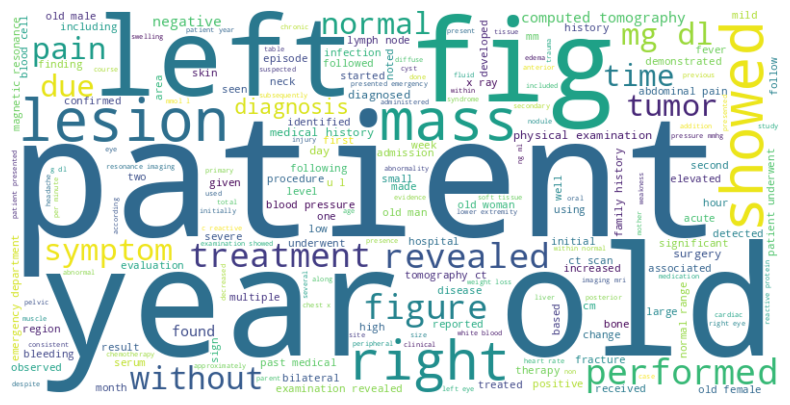

In [12]:
# WordCloud of the processed data
all_text = ' '.join(sampled_df['processed_data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Gender Distribution Plot**
Plots a bar chart showing the distribution of gender in the dataset, using different colors for each gender.

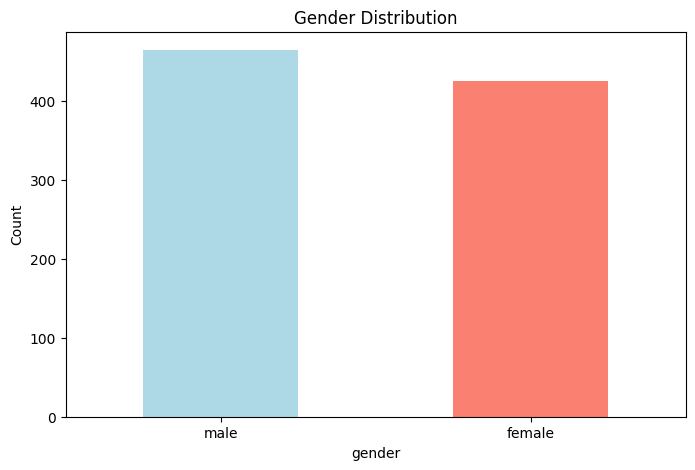

In [13]:
# Plot gender distribution
gender_counts = sampled_df['gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# **Age Distribution Plot**
Filters and converts the 'age' column to numeric values, replacing non-numeric entries with NaN. Then, it plots a histogram to visualize the distribution of age in the dataset.

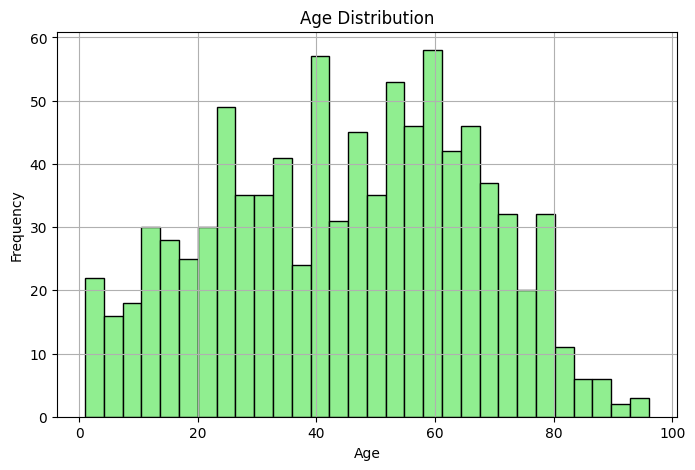

In [14]:
# Filter rows where 'age' is numeric, and convert non-numeric values to NaN
age = pd.to_numeric(sampled_df['age'], errors='coerce')

# Plot age distribution
plt.figure(figsize=(8, 5))

# Drop NaN values and plot histogram for 'age' column
age.dropna().hist(bins=30, color='lightgreen', edgecolor='black')

# Adding title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# **Condition Severity Classification**
* Defines a function classify_condition to categorize text into severity levels (High, Medium, Low, Normal) based on keywords associated with each severity.
* Applies this function to the processed_data column, creating a new column Condition_Severity.
* Visualizes the distribution of the condition severity levels using a bar plot.

<ipython-input-15-a2a2805da733>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')


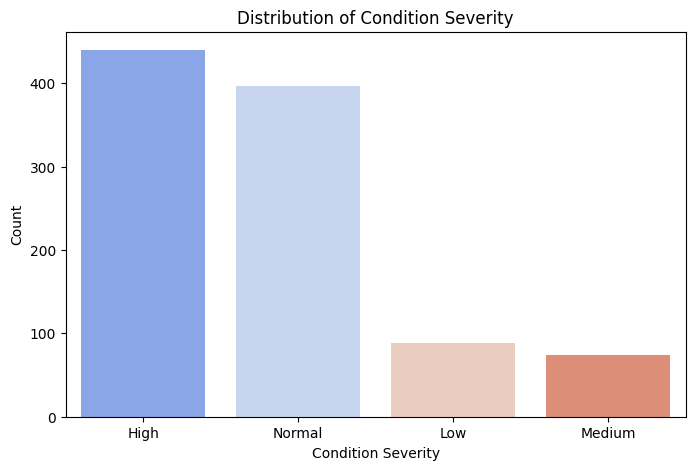

In [15]:
def classify_condition(text):
    high_severity_keywords = ["severe", "acute", "life-threatening", "critical", "emergency", "high risk"]
    medium_severity_keywords = ["moderate", "medium", "concern", "serious"]
    low_severity_keywords = ["mild", "minor", "low risk", "manageable"]
    normal_keywords = ["normal", "healthy", "stable"]

    text = str(text).lower()

    if any(word in text for word in high_severity_keywords):
        return "High"
    elif any(word in text for word in medium_severity_keywords):
        return "Medium"
    elif any(word in text for word in low_severity_keywords):
        return "Low"
    else:
        return "Normal"

# Apply classification to the processed_data column
sampled_df['Condition_Severity'] = sampled_df['processed_data'].apply(classify_condition)

# Count the number of records in each condition severity level
severity_counts = sampled_df['Condition_Severity'].value_counts()

# Plot the distribution of condition severity
plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')
plt.xlabel("Condition Severity")
plt.ylabel("Count")
plt.title("Distribution of Condition Severity")
plt.show()

# **Extracting and Visualizing Top Symptoms**
* Defines a function extract_symptoms to search for and count occurrences of a list of common symptoms in the processed_data column.
* Extracts the top 20 most frequent symptoms from the dataset.
* Visualizes the top symptoms using a bar plot, showing the frequency of each symptom.








<ipython-input-16-80a029bf40a6>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(top_words), palette='coolwarm')


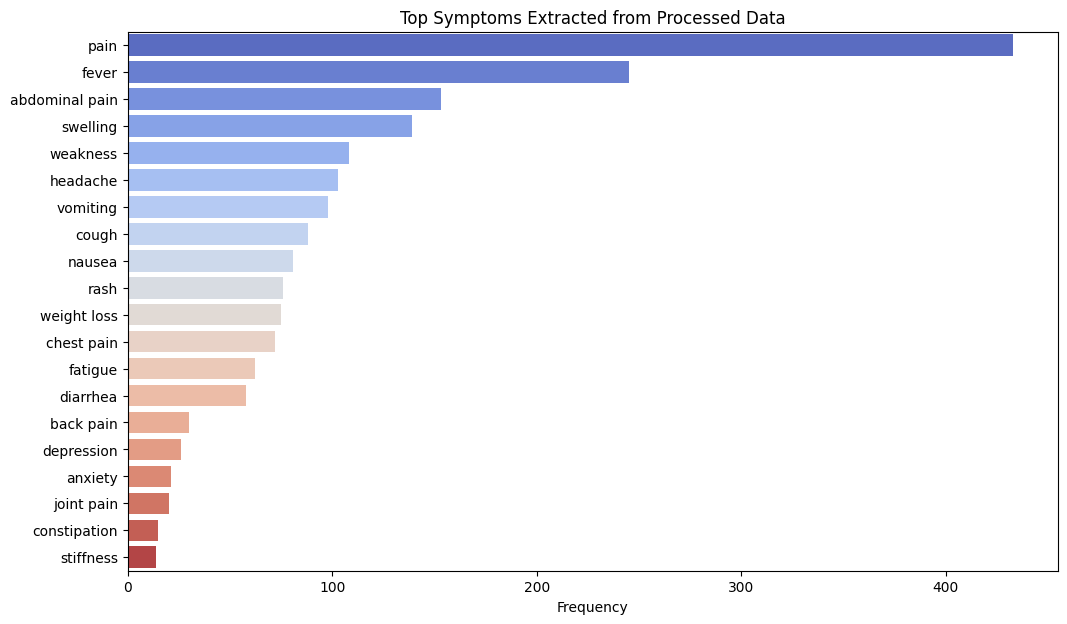

In [16]:
# Extract symptoms from processed_data (extensive list of common symptoms)
def extract_symptoms(texts, top_n=20):
    symptom_keywords = [
        "headache", "fever", "cough", "nausea", "vomiting", "fatigue", "rash", "dizziness", "pain", "chest pain",
        "abdominal pain", "shortness of breath", "diarrhea", "constipation", "sore throat", "back pain", "joint pain",
        "muscle pain", "swelling", "itching", "blurred vision", "palpitations", "loss of appetite", "weight loss",
        "anxiety", "depression", "insomnia", "tremor", "weakness", "burning sensation", "cold sweats", "loss of smell",
        "loss of taste", "confusion", "fainting", "wheezing", "tightness in chest", "stiffness", "dry mouth"
    ]
    symptoms_list = []
    for text in texts:
        phrases = re.findall(r'\b(?:' + '|'.join(symptom_keywords) + r')\b', str(text).lower())
        symptoms_list.extend(phrases)

    symptom_counts = Counter(symptoms_list)
    return symptom_counts.most_common(top_n)

# Extract top symptoms from processed_data column
top_symptoms = extract_symptoms(sampled_df['processed_data'], top_n=20)

# Plotting top symptoms
top_words, counts = zip(*top_symptoms)
plt.figure(figsize=(12, 7))
sns.barplot(x=list(counts), y=list(top_words), palette='coolwarm')
plt.xlabel("Frequency")
plt.title("Top Symptoms Extracted from Processed Data")
plt.show()

# **Extracting and Visualizing Top Diagnoses**
* Defines a function extract_diagnoses to search for and count occurrences of a list of common diagnoses in the processed_data column.
* Extracts the top 20 most frequent diagnoses from the dataset.
* Visualizes the top diagnoses using a bar plot, showing the frequency of each diagnosis.

<ipython-input-17-3eb54f63f4a8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(diag_counts), y=list(top_diag_words), palette='viridis')


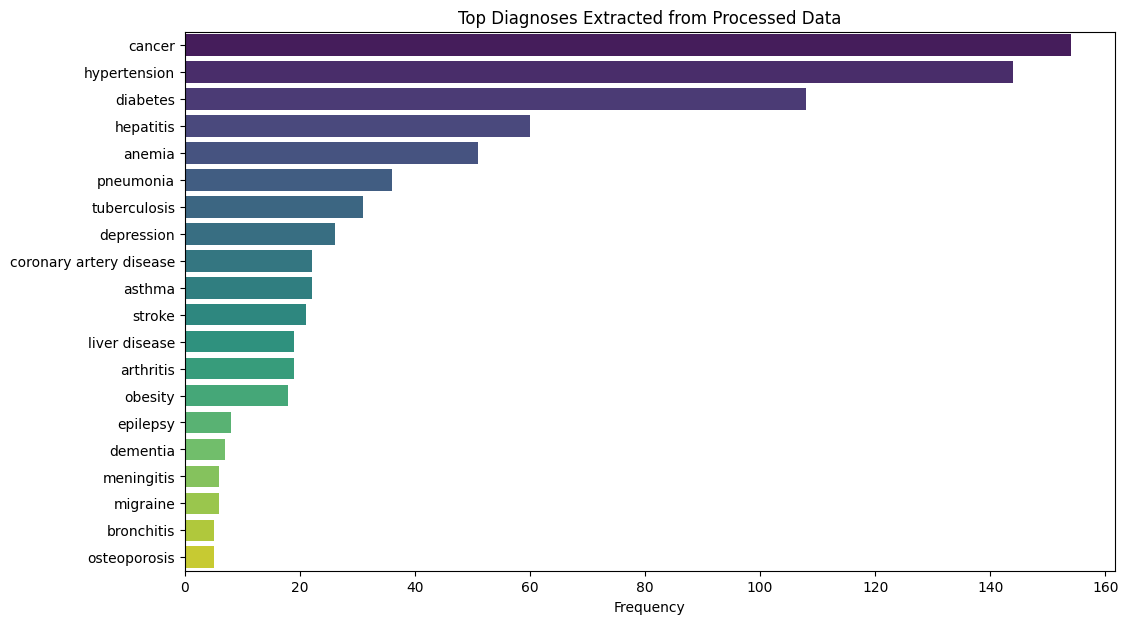

In [17]:
# Extract diagnoses from processed_data (extensive list of common diagnoses)
def extract_diagnoses(texts, top_n=20):
    diagnosis_keywords = [
        "diabetes", "hypertension", "asthma", "cancer", "pneumonia", "stroke", "heart attack", "tuberculosis", "anemia",
        "bronchitis", "arthritis", "migraine", "epilepsy", "depression", "anxiety disorder", "osteoporosis",
        "alzheimer's disease", "kidney failure", "liver disease", "obesity", "dementia", "parkinson's disease",
        "coronary artery disease", "hepatitis", "meningitis", "thyroid disorder", "gastroenteritis"
    ]
    diagnoses_list = []
    for text in texts:
        phrases = re.findall(r'\b(?:' + '|'.join(diagnosis_keywords) + r')\b', str(text).lower())
        diagnoses_list.extend(phrases)

    diagnosis_counts = Counter(diagnoses_list)
    return diagnosis_counts.most_common(top_n)

# Extract top diagnoses from processed_data column
top_diagnoses = extract_diagnoses(sampled_df['processed_data'], top_n=20)

# Plotting top diagnoses
top_diag_words, diag_counts = zip(*top_diagnoses)
plt.figure(figsize=(12, 7))
sns.barplot(x=list(diag_counts), y=list(top_diag_words), palette='viridis')
plt.xlabel("Frequency")
plt.title("Top Diagnoses Extracted from Processed Data")
plt.show()

# **Extracting and Visualizing Top Medications**
* Defines a function extract_medications to search for and count occurrences of a list of common medications in the processed_data column.
* Extracts the top 20 most frequent medications from the dataset.
* Visualizes the top medications using a bar plot, showing the frequency of each medication.

<ipython-input-18-7e6463af266c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(med_counts), y=list(top_med_words), palette='magma')


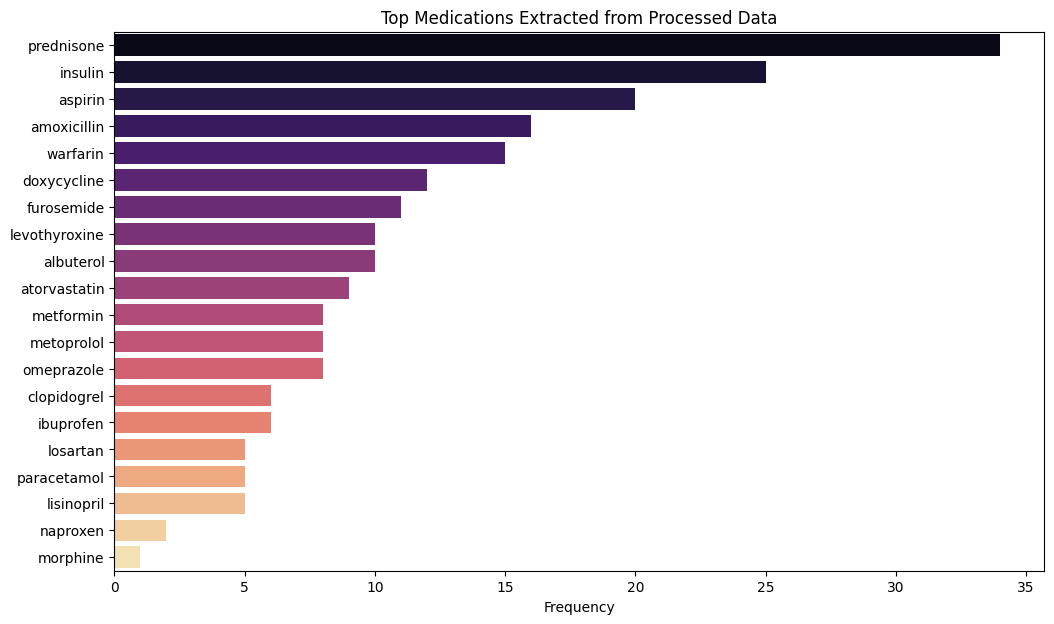

In [18]:
# Extract medications from processed_data (extensive list of common medications)
def extract_medications(texts, top_n=20):
    medication_keywords = [
        "aspirin", "paracetamol", "ibuprofen", "metformin", "amoxicillin", "insulin", "omeprazole", "losartan",
        "atorvastatin", "albuterol", "prednisone", "metoprolol", "furosemide", "lisinopril", "warfarin", "levothyroxine",
        "antibiotics", "antihistamines", "morphine", "naproxen", "clopidogrel", "diazepam", "doxycycline", "hydrochlorothiazide"
    ]
    medications_list = []
    for text in texts:
        phrases = re.findall(r'\b(?:' + '|'.join(medication_keywords) + r')\b', str(text).lower())
        medications_list.extend(phrases)

    medication_counts = Counter(medications_list)
    return medication_counts.most_common(top_n)

# Extract top medications from processed_data column
top_medications = extract_medications(sampled_df['processed_data'], top_n=20)

# Plotting top medications
top_med_words, med_counts = zip(*top_medications)
plt.figure(figsize=(12, 7))
sns.barplot(x=list(med_counts), y=list(top_med_words), palette='magma')
plt.xlabel("Frequency")
plt.title("Top Medications Extracted from Processed Data")
plt.show()

# **Extracting and Visualizing Top Treatments**
* Defines a function extract_treatments to search for and count occurrences of a list of common treatments in the processed_data column.
* Extracts the top 20 most frequent treatments from the dataset.
* Visualizes the top treatments using a bar plot, showing the frequency of each treatment.

<ipython-input-19-413356cf819a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(treat_counts), y=list(top_treat_words), palette='plasma')


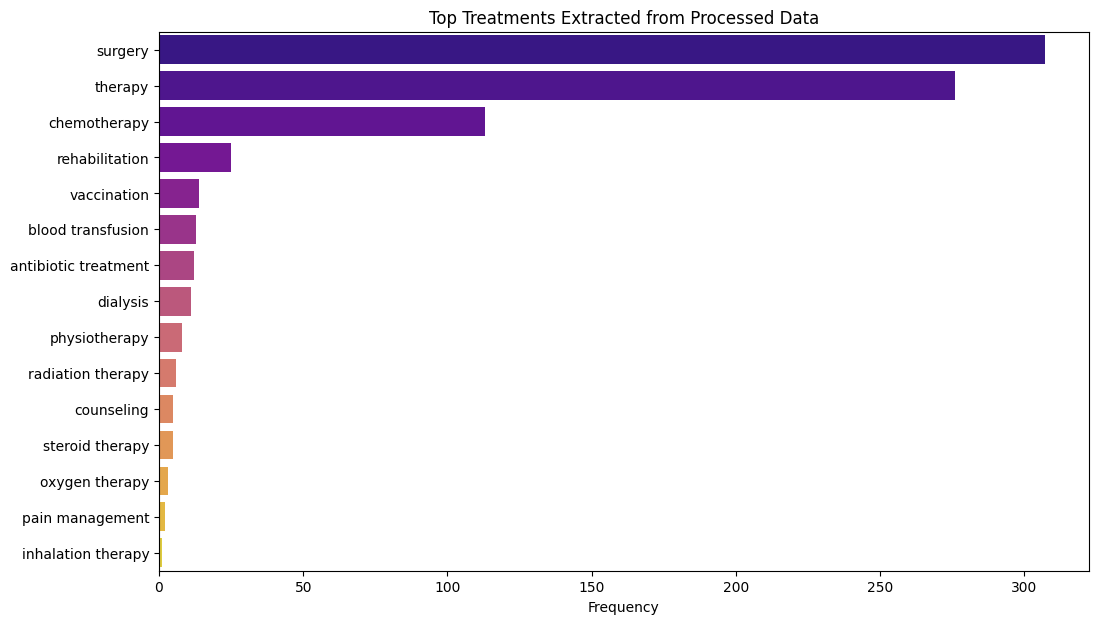

In [19]:
# Extract treatments from processed_data (extensive list of common treatments)
def extract_treatments(texts, top_n=20):
    treatment_keywords = [
        "physiotherapy", "surgery", "chemotherapy", "radiation therapy", "dialysis", "counseling", "vaccination",
        "therapy", "rehabilitation", "blood transfusion", "inhalation therapy", "lifestyle changes", "oxygen therapy",
        "antibiotic treatment", "antiviral therapy", "pain management", "steroid therapy", "dietary changes",
        "exercise regimen", "antidepressant therapy"
    ]
    treatments_list = []
    for text in texts:
        phrases = re.findall(r'\b(?:' + '|'.join(treatment_keywords) + r')\b', str(text).lower())
        treatments_list.extend(phrases)

    treatment_counts = Counter(treatments_list)
    return treatment_counts.most_common(top_n)


# Extract top treatments from processed_data column
top_treatments = extract_treatments(sampled_df['processed_data'], top_n=20)

# Plotting top treatments
top_treat_words, treat_counts = zip(*top_treatments)
plt.figure(figsize=(12, 7))
sns.barplot(x=list(treat_counts), y=list(top_treat_words), palette='plasma')
plt.xlabel("Frequency")
plt.title("Top Treatments Extracted from Processed Data")
plt.show()

# **WordCloud of Processed Conversation**
Generates and displays a word cloud from the processed_conversation column to visualize the most frequent words in the conversation data.

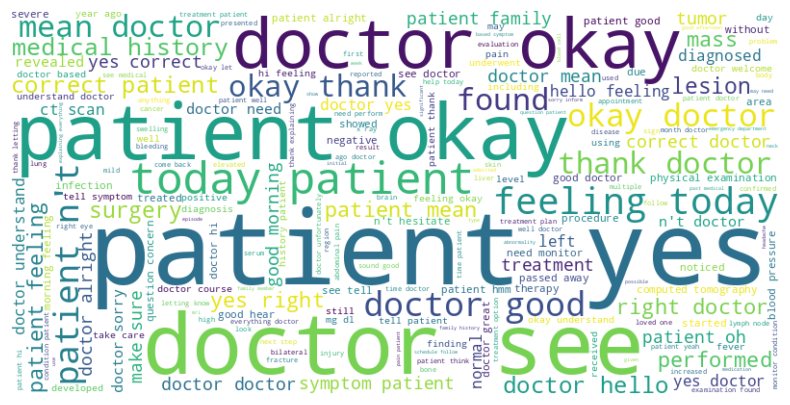

In [31]:
# WordCloud of the processed conversation
all_text = ' '.join(sampled_df['processed_conversation'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Sentiment Analysis of Processed Conversations**
* **Sentiment Calculation:**  Uses TextBlob to calculate the sentiment polarity of each entry in the processed_conversation column, with values ranging from -1 (negative) to 1 (positive).
* **Sentiment Distribution:** Visualizes the sentiment polarity distribution using a histogram with a KDE (Kernel Density Estimate).
* **Basic Statistics:** Displays descriptive statistics (mean, standard deviation, etc.) for the sentiment polarity.
* **Sentiment Count:** Counts the number of positive, negative, and neutral sentiments in the dataset and prints the results.

In [21]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

sampled_df['conversation_sentiment'] = sampled_df['processed_conversation'].apply(get_sentiment)

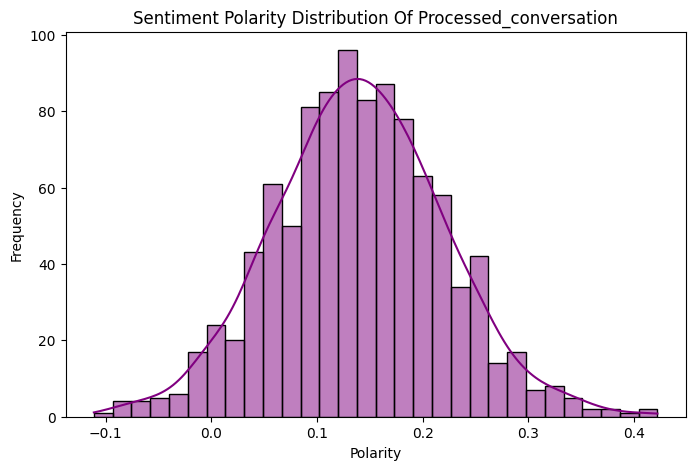

In [22]:
# Display conversation_sentiment insights
plt.figure(figsize=(8, 5))
sns.histplot(sampled_df['conversation_sentiment'], bins=30, kde=True, color='purple')
plt.title('Sentiment Polarity Distribution Of Processed_conversation')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Basic Sentiment Statistics
print("Sentiment Statistics For Processed_conversation:")
print(sampled_df['conversation_sentiment'].describe())

Sentiment Statistics For Processed_conversation:
count    1000.000000
mean        0.140056
std         0.080974
min        -0.111216
25%         0.088588
50%         0.138271
75%         0.193054
max         0.422222
Name: conversation_sentiment, dtype: float64


In [24]:
# Positive, negative, and neutral sentiment counts for processed_conversation
positive_count = (sampled_df['conversation_sentiment'] > 0).sum()
negative_count = (sampled_df['conversation_sentiment'] < 0).sum()
neutral_count = (sampled_df['conversation_sentiment'] == 0).sum()

In [25]:
print(f"Positive Sentiments: {positive_count}")
print(f"Negative Sentiments: {negative_count}")
print(f"Neutral Sentiments: {neutral_count}")

Positive Sentiments: 956
Negative Sentiments: 44
Neutral Sentiments: 0


# **Correlation Between Severity and Sentiment**
* **Severity Mapping:** Maps severity levels (High, Medium, Low, Normal) to numeric values for correlation analysis.
* **Box Plot:** Visualizes the distribution of sentiment scores for each severity level using a box plot.
* **Correlation Coefficient: Calculates and displays the correlation between severity levels and sentiment scores. The correlation is -0.07, indicating a very weak negative relationship. This suggests that as the severity of the condition increases, the sentiment score tends to decrease slightly, but the relationship is weak and not statistically significant.








<ipython-input-26-f5d96ed4f685>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition_Severity', y='conversation_sentiment', data=sampled_df, palette='coolwarm')


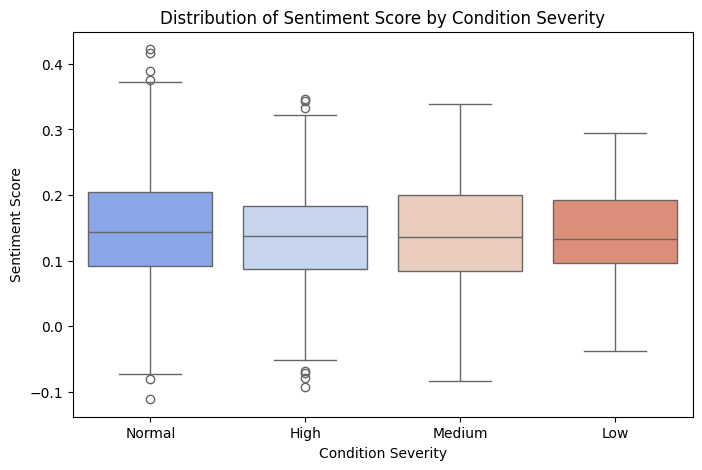

Correlation between Severity and Sentiment Score: -0.07


In [26]:
# Map Severity Levels to Numeric Values for Correlation
severity_mapping = {
    "High": 3,
    "Medium": 2,
    "Low": 1,
    "Normal": 0
}

# Map the severity levels in the 'Condition_Severity' column to numeric values
sampled_df['Severity_Numeric'] = sampled_df['Condition_Severity'].map(severity_mapping)

# Now, plot the correlation between Severity and Sentiment Score using a Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Condition_Severity', y='conversation_sentiment', data=sampled_df, palette='coolwarm')
plt.xlabel("Condition Severity")
plt.ylabel("Sentiment Score")
plt.title("Distribution of Sentiment Score by Condition Severity")
plt.show()

# Optionally, you can compute and display the correlation coefficient
correlation = sampled_df['Severity_Numeric'].corr(sampled_df['conversation_sentiment'])
print(f"Correlation between Severity and Sentiment Score: {correlation:.2f}")

# **Saving Processed Data to CSV**
The sampled_df DataFrame is saved to a CSV file named sample_data.csv without including the index column. This allows for easy export and sharing of the processed data.


In [27]:
sampled_df

,data,conversation,processed_data,processed_conversation,age,gender,Condition_Severity,conversation_sentiment,Severity_Numeric
1801,The third case was a 64-year-old female who ad...,"Doctor: Good afternoon, how are you feeling to...",third case 64-year-old female admitted chest p...,doctor good afternoon feeling today patient hm...,64,female,Normal,0.186458,0
1190,A 34-year-old woman presented with severe epis...,"Doctor: Good morning, how can I help you today...",34-year-old woman presented severe episodic he...,doctor good morning help today patient hi expe...,34,female,High,0.040341,3
1817,"A 53-year-old man, who had non-exertional ches...","Doctor: Hello, Mr. Johnson. How are you feelin...",53-year-old man non-exertional chest pain posi...,doctor hello mr. johnson feeling today patient...,53,male,Normal,0.124829,0
251,"A 34 year old woman from the east of Morocco, ...","Doctor: Good afternoon, Mrs. X. I see here in ...",34 year old woman east morocco married mother ...,doctor good afternoon mrs. x. see medical reco...,34,female,High,0.180910,3
2505,A 19-year-old male of Caucasian origin was adm...,"Doctor: Hello, how are you feeling today?\nPat...",19-year-old male caucasian origin admitted cen...,doctor hello feeling today patient alright tha...,19,male,High,0.110326,3
...,...,...,...,...,...,...,...,...,...
618,A ten-year-old neutered female Cavalier King C...,"Doctor: Hello, how are you today?\nPatient: I'...",ten-year-old neutered female cavalier king cha...,doctor hello today patient okay thanks asking ...,ten,female,Normal,0.152401,0
406,A 65-year-old man with continuous irritable co...,"Doctor: Good morning, Mr. Johnson. How are you...",65-year-old man continuous irritable cough 15 ...,doctor good morning mr. johnson feeling today ...,65,male,Normal,0.235947,0
1157,A 55-year-old woman without relevant medical h...,"Doctor: Hi, how are you feeling today?\nPatien...",55-year-old woman without relevant medical his...,doctor hi feeling today patient lot pain docto...,55,female,High,0.022467,3
1068,A 52-year-old man was first diagnosed with HIV...,"Doctor: Hi there, how are you feeling today?\n...",52-year-old man first diagnosed hiv 1991. main...,doctor hi feeling today patient good doctor ex...,52,male,High,0.062905,3


In [28]:
sampled_df.to_csv('sample_data.csv', index=False)